In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import logging
from numpy import random
#import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

data = pd.read_csv("preProcessedData.csv")

In [2]:
data.head()

,Label,Text,Title
0,bangladesh,রাজধানী থেকে শুরু করে প্রান্তিক পর্যায়ের স্কুল...,শুরু হচ্ছে পুষ্টি প্রথম আলো স্কুল বিতর্ক উৎসব
1,bangladesh,কবি ঔপন্যাসিক ও অনুবাদক মোস্তফা মীর আর নেই ইন্...,কবি মোস্তফা মীর আর নেই
2,bangladesh,সিলেট ওসমানী আন্তর্জাতিক বিমানবন্দরে আড়াই কেজি...,সিলেট ওসমানী বিমানবন্দরে যাত্রীর জুতা থেকে সোন...
3,bangladesh,নীলফামারীর ডোমারে সড়ক দুর্ঘটনায় ওবায়দুল হক না...,ডোমারে সড়ক দুর্ঘটনায় খাদ্য কর্মকর্তা নিহত
4,bangladesh,টাঙ্গাইলের কালিহাতীতে ট্রাক উল্টে খাদে পড়ে পাঁ...,টাঙ্গাইলের কালিহাতীতে ট্রাক উল্টে ৫ নির্মাণশ্র...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6660 entries, 0 to 6659
Data columns (total 3 columns):
Label    6660 non-null object
Text     6660 non-null object
Title    6660 non-null object
dtypes: object(3)
memory usage: 156.2+ KB


In [4]:
col = ['Label','Text']
data = data[col]

In [5]:
data.columns

Index(['Label', 'Text'], dtype='object')

In [6]:
data.columns = ['Label','Text']

In [8]:
data['category_id'] = data['Label'].factorize()[0]

In [9]:
data.head()

,Label,Text,category_id
0,bangladesh,রাজধানী থেকে শুরু করে প্রান্তিক পর্যায়ের স্কুল...,0
1,bangladesh,কবি ঔপন্যাসিক ও অনুবাদক মোস্তফা মীর আর নেই ইন্...,0
2,bangladesh,সিলেট ওসমানী আন্তর্জাতিক বিমানবন্দরে আড়াই কেজি...,0
3,bangladesh,নীলফামারীর ডোমারে সড়ক দুর্ঘটনায় ওবায়দুল হক না...,0
4,bangladesh,টাঙ্গাইলের কালিহাতীতে ট্রাক উল্টে খাদে পড়ে পাঁ...,0


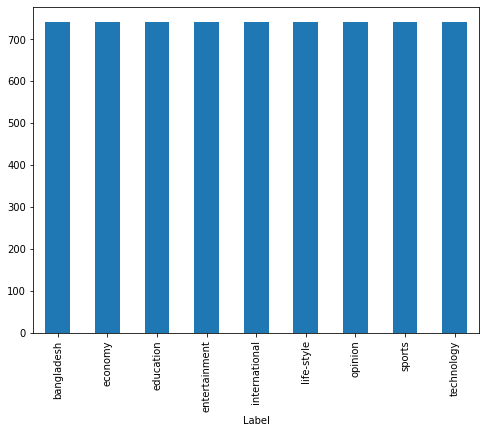

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))

features = tfidf.fit_transform(data.Text).toarray()
labels = data.category_id
features.shape

(6660, 54131)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(data['Text'],
                                                    data['Label'],
                                                    random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = LinearSVC().fit(X_train_tfidf, y_train)

In [17]:
print(clf.predict(count_vect.transform(["রাজধানী থেকে শুরু করে প্রান্তিক পর্যায়ের স্কুলের শিক্ষার্থীদের বিতর্কে আগ্রহী করে তোলার লক্ষ্য নিয়ে শুরু হচ্ছে পুষ্টি প্রথম আলো স্কুল বিতর্ক উৎসব  যুক্তির জয়গান গেয়ে নিজেকে পরিবর্তন করতে চাওয়া স্কুলশিক্ষার্থীদের জন্যই এবারে দেশব্যাপী এ আয়োজন শুরু হতে যাচ্ছে  আজ বুধবার প্রথম আলো কার্যালয়ে বিতর্ক উৎসবের আয়োজনের জন্য প্রথম আলো এবং টি কে গ্রুপের মধ্যে একটি সমঝোতা স্মারক সই হয় প্রথম আলোর সহযোগী সম্পাদক আনিসুল হক এবং টি কে গ্রুপের পরিচালক মার্কেটিং মোহাম্মদ মোফাচ্ছেল হক সমঝোতা স্মারকে সই করেন  আনিসুল হক বলেন অনলাইনের এ যুগে স্কুলের শিক্ষার্থীদের বিতর্কে আগ্রহ ধরে রাখা বেশ কঠিন সেই কঠিন কাজটিকে সৃজনশীল উপায়েই করতে যাচ্ছি আমরা বিতর্ক প্রতিযোগিতার বদলে আমরা এ জন্য বিতর্ক উৎসব করছি মোহাম্মদ মোফাচ্ছেল হক বলেন আমরা দেশের অর্থনীতিতে ইতিবাচক ভূমিকা রাখছি অনেক বছর ধরেই সেই পরিপ্রেক্ষিতে আমরা প্রথম আলোর সঙ্গে যুক্ত হয়ে স্কুলশিক্ষার্থীদের অনুপ্রেরণা দিতে চাই বিতর্ক প্রতিযোগিতার মাধ্যমে কেবল জাতীয় পর্যায়ে নয় শিক্ষার্থীদের আন্তর্জাতিক পরিমণ্ডলেও আমরা নিয়ে যেতে চাই অনুষ্ঠানের শুরুতে স্বাগত বক্তব্যে প্রথম আলোর যুব কর্মসূচির সমন্বয়ক মুনির হাসান বলেন সারা দেশে টি অঞ্চলে ভাগ করে স্কুল পর্যায়ের এই বিতর্ক উৎসব আয়োজন করা হবে সেপ্টেম্বর অক্টোবর মাসজুড়ে সারা দেশে চলবে এ আয়োজন বিতর্ক উৎসব প্রচলিত বিতর্ক প্রতিযোগিতা ছাড়াও পাবলিক স্পিকিং উপস্থাপনাসহ বিভিন্ন বুদ্ধিবৃত্তিক বিষয়ে হাতে কলমে প্রশিক্ষণ ও কর্মশালা অনুষ্ঠিত হবে তিনি আরও জানান কেবল তর্কের জন্য আমরা বিতর্কের আয়োজন করতে যাচ্ছি না যারা যুক্তির জয়গান গেয়ে নিজেকে পরিবর্তন করতে চায় সেসব স্কুল শিক্ষার্থীকে নিয়ে আমরা স্কুল বিতর্ক উৎসব আয়োজন করছি এটা নিছকই বিতর্ক প্রতিযোগিতা হবে না উৎসবের মাধ্যমে আমরা শিক্ষার্থীদের নানাবিদ সৃজনশীল কাজে যুক্ত করতে চাই সমঝোতা স্মারক স্বাক্ষর অনুষ্ঠানে আরও উপস্থিত ছিলেন প্রথম আলোর সম্পাদক মতিউর রহমান ফিচার সম্পাদক সুমনা শারমীন ইভেন্ট ও অ্যাক্টিভিশন ব্যবস্থাপক কবির বকুল ব্র্যান্ড কমিউনিকেশনস ম্যানেজার জাবেদ সুলতান টি কে গ্রুপের প্রধান মানবসম্পদ ও প্রশাসন কর্মকর্তা কর্নেল এ আর গণি পিএসসিজি অব  হেড অব ব্র্যান্ড ইব্রাহীম খলিল নয়ন ব্র্যান্ড ম্যানেজার আশরাফুল হোছাইন ক্রসওয়াকের ব্যবস্থাপনা পরিচালক এম এ মারুফ ওয়াই ডাব্লিউ সিএ স্কুলের বিতর্ক ক্লাবের মডারেটর মাসুমা খাতুন ও রিপা বর্নাডেট গমেজ বাংলাদেশ ডিবেট ফেডারেশনের সভাপতি আবদুল্লাহ মহম্মদ শুকরানা যোসেফাইট ডিবেটিং ক্লাবের প্রধান মডারেটর মোহাম্মদ হুমায়ুন কবীর ও মডারেটর জিয়া হাসান বন্ধুসভার জাতীয় পর্যালোচনা পর্ষদের সভাপতি সাইদুজ্জামান এনডিএফ বিডির চেয়ারম্যান এ কে এম শোয়েব ঢাকা ইউনিভার্সিটি ডিবেটিং সোসাইটির সাধারণ সম্পাদক আবদুল্লাহ আল নোমান সুমন সহসভাপতি আব্দুল কাইয়ুম বুয়েট ডিবেটিং ক্লাবের সভাপতি আহমদ রাশীক ফাইয়াজ  প্রথম আলোর যুব কর্মসূচির সমন্বয়ক মুনির হাসান অনুষ্ঠানটি সঞ্চালনা করেন"])))

['bangladesh']


In [18]:
print(clf.predict(count_vect.transform(["ক্ষমতায় আসার চার বছর পরও ভারতের প্রধানমন্ত্রী নরেন্দ্র মোদির প্রতি আস্থা আছে প্রায়  শতাংশ ভারতীয়র সাড়ে আট লাখ মানুষের ওপর পরিচালিত এক জরিপে এ চিত্র উঠে এসেছে  মোদির বিজেপি চার বছর পূর্ণ করেছে গতকাল  মে  সালে এদিন ভারতের তম প্রধানমন্ত্রী হিসাবে ক্ষমতায় এসেছিলেন এই গুজরাটি এই চার বছরের শাসনামল ভারতের মানুষ কীভাবে দেখছে তা জানতে টাইমস গ্রুপ একটি সমীক্ষা চালায় এ মাসের  থেকে  তারিখে দেশের  লাখ  হাজার মানুষের মধ্যে চালানো হয় এই সমীক্ষা এই সমীক্ষায় বলা হয়েছে  দশমিক  শতাংশ ভোটার মোদির ওপর আস্থা ব্যক্ত করেছেন আগামী  সালে ভারতে অনুষ্ঠিত হতে চলেছে পরবর্তী লোকসভা নির্বাচন চার বছরের শাসনের ইতিবাচক নেতিবাচক নানা দিক তুলে এনেছে টাইমস গ্রুপ তাদের সমীক্ষায় সমীক্ষায় বলা হয়েছে আগামী লোকসভা নির্বাচনে  দশমিক  শতাংশ ভোটার বিজেপি বা কংগ্রেস কাউকেই চাইছে না কেন্দ্রের ক্ষমতায় আবার  দশমিক  শতাংশ ভোটার রাহুল গান্ধীকে প্রধানমন্ত্রী হিসেবে চাইছেন মোদির চার বছরের শাসনে কেমন আছেন ভোটাররা সেই প্রশ্নের জবাবে  দশমিক  শতাংশ ভোটার বলেছেন তাঁরা মোদির জমানায় খুব ভালো আছেন  দশমিক  শতাংশ ভোটার বলেছেন তাঁরা ভালো আছেন খুব খারাপ আছেন এমন মন্তব্য করা ভোটারের সংখ্যা  দশমিক  শতাংশ আর  দশমিক  শতাংশ ভোটর এই প্রশ্নের কোনো উত্তর দেননি মোদি সরকারের এই চার বছরের শাসনে সবচেয়ে বেশি সাফল্য কী ছিল এ প্রশ্নের জবাবে ভোটাররা বলেছেন প্রথম সাফল্য ছিল জিএসটি চালু দ্বিতীয় সাফল্য ছিল নোট বাতিলের সিদ্ধান্ত এবং তৃতীয় সাফল্য ছিল পাকিস্তানের মাটিতে সার্জিক্যাল স্ট্রাইকের সিদ্ধান্ত আর ব্যর্থতার তালিকার শীর্ষে ছিল দেশের মানুষের জন্য কর্মসংস্থান তৈরিতে ব্যর্থতা"])))

['international']


In [19]:
print(clf.predict(count_vect.transform(["ভারতের প্রধানমন্ত্রী নরেন্দ্র মোদির তম জন্মদিন ছিল গতকাল রোববার তারকাদের মধ্যে অনেকেই সামাজিক যোগাযোগমাধ্যমে মোদিকে শুভেচ্ছা জানিয়েছেন আনুশকা শর্মাও আছেন এই দলে এদিকে জন্মদিনের আগেই আনুশকাকে আমন্ত্রণ জানিয়ে বসে আছেন মোদি না জন্মদিনের অনুষ্ঠানের আমন্ত্রণ নয় এই তারকাকে নরেন্দ্র মোদি তাঁর পরিচ্ছন্নতা অভিযান সোয়াচ্ছতা হি সেবা ক্যাম্পেইনে অংশ নেওয়ার আহ্বান জানিয়েছেন স্বয়ং প্রধানমন্ত্রীর কাছ থেকে এত বড় এক ক্যাম্পেইনের আমন্ত্রণ পেয়ে আনুশকাও গর্বিত  টুইটারে মোদিকে শুভেচ্ছা জানিয়ে আনুশকা লিখেন আমাদের প্রধানমন্ত্রী নরেন্দ্র মোদিকে জন্মদিনের শুভেচ্ছা ধন্যবাদ স্যার আমাকে সোয়াচ্ছতা হি সেবা অভিযানের সঙ্গে যুক্ত হওয়ার আমন্ত্রণ জানানোর জন্য সেখানে মোদির কাছ থেকে পাওয়া চিঠির ছবিও প্রকাশ করেছেন যব হ্যারি মেট সেজাল সিনেমার এই তারকা আনুশকা বলেন সোয়াচ ভারত অভিযানের অংশ হতে পেরে আমি ভীষণ গর্বিত এখন সোয়াচ্ছতা হি সেবা এর মতো মহৎ উদ্যোগেও আমার সেরাটা দেওয়ার চেষ্টা করব সোয়াচ ভারত মোদি সরকারের একটি পরিচ্ছন্নতা ক্যাম্পেইন এ উদ্যোগেরই নতুন অভিযান সোয়াচ্ছতা হি সেবা এ অভিযানে মালায়ালাম সুপারস্টার মোহনলালকেও আমন্ত্রণ জানিয়েছেন মোদি ডেকান ক্রনিকল"])))

['entertainment']


In [20]:
print(clf.predict(count_vect.transform(["বন্ধ কারখানা চালু শ্রমিক নেতার ওপর হামলাকারীদের শাস্তি ও বেতন ভাতা বৃদ্ধির দাবিতে গাজীপুর নগরের পানিশাইল টঙ্গী এবং পুরান ঢাকার ওয়াইজঘাট এলাকায় গতকাল শনিবার বিক্ষোভ ও সড়ক অবরোধ করেছেন পোশাকশ্রমিকেরা এ সময় পুলিশের সঙ্গে শ্রমিকদের সংঘর্ষে অন্তত  জন আহত হন শ্রমিক অসন্তোষের কারণে গাজীপুরে কয়েকটি কারখানায় আজ রোববার ছুটি ঘোষণা করা হয়েছে গাজীপুরে শ্রমিক ও শিল্প পুলিশ সূত্রে জানা গেছে নগরের পানিশাইল এলাকার মাছিহাতা সোয়েটার কারখানায় গত বুধবার শ্রমিকনেতা আমিনুল ইসলামের নেতৃত্বে শ্রমিকেরা বিভিন্ন দাবিতে বিক্ষোভ করেন তাঁরা অনিয়মের অভিযোগ এনে কারখানার সহকারী উৎপাদন কর্মকর্তা জহিরুল ইসলামকে বরখাস্তের দাবি জানান বুধবার রাত আটটার দিকে জহিরুল লোকজন নিয়ে আমিনুলের ওপর হামলা চালান পরে আশপাশের লোকজন আহত আমিনুলকে উদ্ধার করে সাভারের এনাম মেডিকেল কলেজ হাসপাতালে নিয়ে যায় তাঁর ওপর হামলার খবর কারখানায় ছড়িয়ে পড়লে শ্রমিকেরা বিক্ষোভ ও ভাঙচুর করেন পরদিন বৃহস্পতিবার অনির্দিষ্টকালের জন্য কারখানা বন্ধ ঘোষণা করে কর্তৃপক্ষ কারখানা খুলে দেওয়া ও জহিরুলের শাস্তির দাবিতে গতকাল সকালে কারখানার ফটকে জড়ো হয়ে বিক্ষোভ করেন শ্রমিকেরা তাঁদের সঙ্গে আরও কয়েকটি কারখানার শ্রমিক যোগ দেন সকাল সাড়ে নয়টার দিকে বিক্ষুব্ধ শ্রমিকেরা কালিয়াকৈর নবীনগর সড়ক অবরোধ করেন এ সময় শিল্প পুলিশ এসে শ্রমিকদের বুঝিয়ে শান্ত করার চেষ্টা করলে তাঁরা আরও উত্তেজিত হয়ে ওঠেন একপর্যায়ে পুলিশ পরিস্থিতি নিয়ন্ত্রণে আনতে শ্রমিকদের লাঠিপেটা করে এ সময় দুই পক্ষে সংঘর্ষ শুরু হলে পুলিশ কাঁদানে গ্যাস রাবার বুলেট ও গরম পানি ছোড়ে পরিস্থিতি নিয়ন্ত্রণে আনে এ সময় দুই পক্ষের সংঘর্ষে পুলিশের সাত সদস্যসহ প্রায়  জন আহত হন শ্রমিকেরা সরে গেলে বেলা দেড়টার দিকে ওই মহাসড়কে যান চলাচল স্বাভাবিক হয় শ্রমিকদের অবরোধের কারণে ওই সড়কে দীর্ঘ যানজটের সৃষ্টি হয় মাছিহাতা সোয়েটার কারখানার শ্রমিক লিংকিং অপারেটর ইমরান হোসেন অভিযোগ করেন তাঁরা উৎপাদিত পণ্যের মজুরি বাড়ানোর দাবি জানিয়ে আসছিলেন কর্তৃপক্ষ দাবি না মেনে উল্টো তাঁদের চাকরিচ্যুতি ও হামলার হুমকি দিচ্ছে  জুলাই কারখানার এক কর্মকর্তার সঙ্গে তাঁদের বাগিবতণ্ডার একপর্যায়ে উত্তেজিত শ্রমিকেরা জহিরুলকে লাঞ্ছিত করেন এর জের ধরে শ্রমিক আমিনুলকে মারধর করা হয় এ ঘটনার পর কর্তৃপক্ষ কারখানা বন্ধ ঘোষণা করে ঈদের আগে কারখানা বন্ধ ঘোষণা করায় শ্রমিকেরা বিক্ষুব্ধ হন কারখানার ব্যবস্থাপক প্রশাসন সনদ সাহা জানান শ্রমিকদের দাবি ধাওয়া নিয়ে আলোচনা চলছে  গাজীপুর শিল্পাঞ্চল পুলিশের পরিদর্শক মো শওকত কবির জানান পরিস্থিতি নিয়ন্ত্রণে আনতে পুলিশ টি গুলি ও টি কাঁদানে গ্যাসের শেল ছোড়ে শ্রমিক বিক্ষোভের কারণে মাছিহাতা কারখানার আশপাশের অন্তত টি কারখানা শনিবার ছুটি ঘোষণা করা হয় মজুরি বাড়ানোর দাবিতে টঙ্গীর বড় দেওড়া ফকির মার্কেট এলাকায় সকালে ইউরোবাংলা সোয়েটার কারখানার শ্রমিকেরা বিক্ষোভ করেন বিক্ষোভের একপর্যায়ে মালিক পক্ষের লোকজনের সঙ্গে শ্রমিকদের হাতাহাতি হয় শ্রমিকদের দাবি তাঁরা প্রতিটি সোয়েটার তৈরির জন্য  টাকা পান কয়েক দিন ধরে তাঁরা প্রতি সোয়েটারে  টাকা বাড়ানোর দাবি জানিয়ে আসছে শিল্প পুলিশ জানায় খবর পেয়ে তাঁরা ঘটনাস্থলে গিয়ে পরিস্থিতি নিয়ন্ত্রণে আনে পরে মালিক ও শ্রমিকদের সঙ্গে আলোচনা করে প্রতি সোয়েটারে পাঁচ টাকা বৃদ্ধির ব্যাপারে উভয় পক্ষ সমঞ্চত হয় কারখানার প্রশাসনিক কর্মকর্তা মো জিহাদ বলেন শ্রমিকদের দাবি মেনে নেওয়া হয়েছে এদিকে পুরান ঢাকার ওয়াইজঘাটে গতকাল প্রগতি ফ্যাশন ওয়ার লিমিটেড নামে একটি তৈরি পোশাক কারখানা বন্ধ করে দেওয়া হয়েছে প্রতিবাদে সকালে কারখানার সামনে বিক্ষোভ করেন শ্রমিকেরা শ্রমিকেরা অভিযোগ করেন ঈদের সময় বেতন ভাতা ও বোনাস না দিয়ে পরিকল্পিতভাবে প্রতিষ্ঠানটি বন্ধ করা হয়েছে কারখানার শ্রমিক মেহেরজান বেগম জানান আট দিন আগে মালিকপক্ষ কারখানাটি সংস্কার করা হবে বলে আমাদের এক সপ্তাহ ছুটি দিয়ে শনিবার গতকাল কাজে যোগ দিতে বলে সকালে কারখানায় ঢুকতে গেলে দারোয়ান শ্রমিকদের বাধা দিয়ে বলেন কারখানা বন্ধ করে দেওয়া হয়েছে   প্রগতি ফ্যাশনের সহকারী ব্যবস্থাপক এজিমএম মো আজাদী অবশ্য দাবি করেন শ্রমিকদের অভিযোগ সঠিক নয় সম্প্রতি রাজউক কর্তৃপক্ষ আল ফেসানী মার্কেট ভবন পরিত্যক্ত ঘোষণা করেছে এ ভবনের দ্বিতীয় তৃতীয় ও ষষ্ঠ তলায় প্রগতি ফ্যাশন ঝুঁকির কারণে সাময়িকভাবে কারখানাটি বন্ধ ঘোষণা করা হয়েছে এটি অন্যত্র সরিয়ে সব শ্রমিককে সুযোগ দেওয়া হবে এ ছাড়া শ্রমিকদের বেতন ভাতা পরিশোধ করা হয়েছে বলেও তিনি দাবি করেন কোতোয়ালি থানার ভারপ্রাপ্ত কর্মকর্তা ওসি মো শাহ আলম বলেন ঘটনাস্থলে অতিরিক্ত পুলিশ মোতায়েন করা হয়েছে পরিস্থিতি নিয়ন্ত্রণে রয়েছ"])))

['economy']


In [21]:
print(clf.predict(count_vect.transform(["লিভারপুল স্কোয়াড এখন দুবাইয়ের পথে সেখানে অনুশীলন ক্যাম্প হবে তাদের তবে এই সফরে স্কোয়াডের সবাই গেলেও বাদ পড়েছেন ফিলিপে কুতিনহো ব্রাজিলিয়ান মিডফিল্ডারের কাঙ্ক্ষিত ঠিকানা তো বেশ কিছু দিন আগে থেকেই বার্সেলোনা তিনি এখন সেখানে পৌঁছানোর শেষ ধাপে  স্প্যানিশ সংবাদমাধ্যম স্পোর্ত জানিয়েছে কুতিনহোর ট্রান্সফার নিয়ে লিভারপুল বার্সেলোনার আলোচনা এখন চূড়ান্ত পর্যায়ে সে জন্য বার্সেলোনায় পা রেখেছেন  বছর বয়সী তারকার এজেন্ট ব্রিটিশ সংবাদমাধ্যম জানিয়েছে কুতিনহোকে এর আগে বার্সা যে দামে  কোটি ইউরো কিনতে চেয়েছিল তার চেয়ে বেশি দাম চেয়েছে লিভারপুল সেটা  কোটি  লাখ পাউন্ড প্রায়  কোটি  লাখ ইউরো  এর মধ্যে  কোটি গ্যারান্টেড ফি বাকিটা অ্যাড অনস বাংলাদেশি মুদ্রায় অঙ্কটা প্রায়  হাজার  কোটি  লাখ  হাজার  টাকা চুক্তিপত্রে রিলিজ ক্লজ নেই এমন খেলোয়াড়দের মধ্যে এটিই হবে সর্বোচ্চ অঙ্কের ট্রান্সফার ফি বার্সা তাঁকে এ দামেই কিনতে রাজি সে জন্য দুই ক্লাবই তাদের প্রতিনিধি পাঠিয়েছে একে অপরের কাছে চুক্তিপত্র চূড়ান্ত করতে বার্সেলোনায় কুতিনহোর এজেন্টের সঙ্গে রয়েছেন একজন আইনজীবী ওদিকে অ্যানফিল্ডেও প্রতিনিধি পাঠিয়েছে বার্সা সঙ্গে রয়েছেন কুতিনহোর প্রতিনিধি তাঁরাও চুক্তির শর্তাবলি চূড়ান্ত করবেন স্প্যানিশ সংবাদমাধ্যম জানিয়েছে কুতিনহোর এই বহুল আলোচিত দলবদল সম্পন্ন হতে পারে যেকোনো সময়ে কিছুদিন আগে থেকেই অবশ্য সে ইঙ্গিত পাওয়া যাচ্ছে চোটের অজুহাতে এর আগে কুতিনহোকে ইংলিশ প্রিমিয়ার লিগের ম্যাচে স্কোয়াডের বাইরে রেখেছিলেন লিভারপুল কোচ ইয়ুর্গেন ক্লপ পরে এফএ কাপের ম্যাচেও তাঁকে বিবেচনা করেননি  সালে ইন্টার মিলান থেকে কুতিনহোকে কিনতে মাত্র  লাখ পাউন্ড খরচ হয়েছিল লিভারপুলের ব্রাজিল মিডফিল্ডের অন্যতম সেরা খেলোয়াড়টিকে ন্যু ক্যাম্পে বেচে অলরেডরা যে মোটা অঙ্কের লাভ করবে তা বলাই বাহুল্য কিন্তু কুতিনহো চলে গেলে লিভারপুল আক্রমণভাগের মাস্তুল ধরবেন কে ফরাসি সংবাদমাধ্যম লেকিপ জানিয়েছে লেস্টার সিটির রিয়াদ মাহরেজকে দিয়ে শূন্যতাটা পূরণ করতে চায় তারা কুতিনহোকে ন্যু ক্যাম্পে পাঠানোর প্রক্রিয়া শুরু পাশাপাশি ফক্সেসদের সঙ্গে নাকি আলোচনাও শুরু করেছে লিভারপুল"])))

['sports']


In [22]:
print(clf.predict(count_vect.transform(["প্রিয় পরীক্ষার্থী আজ গণিত বিষয়ের বহুনির্বাচনি প্রশ্নোত্তর দেওয়া হলো  অধ্যায়   হ্ন কোণের সম্পূরক কোণের অর্ধেক কত  ক হ্ন খ হ্ন গ হ্ন ঘ হ্ন  তিনটি বাহুর দৈর্ঘ্য সেন্টিমিটারে সেমি দেওয়া আছে কোন ক্ষেত্রে সমকোণী ত্রিভুজ অঙ্কন করা সম্ভব  ক    খ    গ    ঘ      ত্রিভুজটির ক্ষেত্রফল কত বর্গ সেমি  ক  খ  গ  ঘ    এ বৃহত্তম বাহু  হলে            নিচের কোনটি সঠিক  ক  ও  খ  ও  গ  ও  ঘ   ও   চিত্রে  হলে   এর মান কত  ক হ্ন খ হ্ন গ হ্ন ঘ হ্ন  চিত্রে ও কোণদ্বয় পরস্পর   সমান   পূরক  সন্নিহিত নিচের কোনটি সঠিক  ক  ও  খ  ও  গ  ও  ঘ   ও   চিত্রে  এবং  ছেদক হলে                সমকোণ নিচের কোনটি সঠিক  ক  ও  খ  ও  গ  ও  ঘ   ও   চিত্রে সূক্ষ্মকোণী ত্রিভুজ  এ                       হ্ন নিচের কোনটি সঠিক  ক  ও  খ  ও  গ  ও  ঘ   ও  নিচের চিত্রের আলোকে  ও  নম্বর প্রশ্নের উত্তর দাও    এর পূরক কোণের পরিমাপ কত  ক হ্ন খ হ্ন গ হ্ন ঘ হ্ন  চিত্রে নির্দেশিত প্রবৃদ্ধ কোণ এবং  এর সম্পূরক কোণের সমষ্টি কত  ক হ্ন খ হ্ন গ হ্ন ঘ হ্ন  পাশের চিত্রে  এর মান কত  ক হ্ন খ হ্ন গ হ্ন ঘ হ্ন  চিত্রে      হ্ন     হ্ন    হ্ন নিচের কোনটি সঠিক  ক  ও  খ  ও  গ  ও  ঘ   ও  চিত্রে  এর   ও  বাহুর মধ্যবিন্দু যথাক্রমে   ও  ওপরের তথ্যের আলোকে  থেকে  নম্বর প্রশ্নের উত্তর দাও   চিত্রে  একটি  ক সমকোণী ত্রিভুজ খ সমদ্বিবাহু ত্রিভুজ গ সমবাহু ত্রিভুজ ঘ বিষমবাহু ত্রিভুজ   এর পরিসীমা কত একক  ক  খ  গ  ঘ    এর  ও  যথাক্রমে  ও  বাহুর মধ্যবিন্দু হলে    কত  ক    খ    গ    ঘ     চিত্রে    কোন ধরনের কোণ  ক স্থ্থূলকোণ খ সম্পূরক কোণ গ পূরক কোণ ঘ প্রবৃদ্ধ কোণ বাকি অংশ ছাপা হবে আগামীকাল মাস্টার ট্রেইনার শিক্ষক উদয়ন উচ্চমাধ্যমিক বিদ্যালয় ঢাকা উত্তর গণিত অধ্যায়   গ  খ  ক  গ  গ  খ  ঘ  গ  গ  ঘ  ক  ক  গ  গ  ঘ  ঘ"])))

['education']


In [23]:
print(clf.predict(count_vect.transform(["্রশ্ন চোখের গঠন ট্যারা হলে কোনো সমস্যা হয় উত্তর নানা কারণে চোখ ট্যারা হতে পারে এর মধ্যে জন্মগত বা বংশগত কারণটিই প্রধান চোখের পাওয়ার খুব বেশি প্লাস বা মাইনাস থাকলে কোনো কারণে এক চোখের দৃষ্টি কম থাকলে এমনটি হতে পারে তবে জন্মগত বা বংশগত ট্যারা দুই চোখেই সাধারণত ছোটবেলায় ভালো দৃষ্টিশক্তি থাকে কিন্তু এক চোখ ট্যারা থাকার কারণে এতে দৃষ্টির ভালো উন্নতি হয় না অস্ত্রোপচারের মাধ্যমে চোখ সোজা করে নেওয়া যায় যত অল্প বয়সে এটি করা যায় তত দুই চোখের দৃষ্টির উন্নতি ভালো হবে আট বছর বয়সের আগেই চিকিৎসা না নিলে আশানুরূপ উন্নতি না ও হতে পারে অধ্যাপক ডা এম নজরুল ইসলাম চক্ষু বিভাগ বারডেম হাসপাতাল ঢাকা"])))

['life-style']


In [24]:
print(clf.predict(count_vect.transform(["রমনা পার্কের পূর্ব পাশের সড়ক ধরে দক্ষিণে এগোলে কাকরাইল মসজিদ পার হতে বাঁ দিকে জনস্বাস্থ্য প্রকৌশল বিভাগের যে বিশাল ভবনটি আছে তার সামনে বড়সড় ফলকে লেখা শেখ হাসিনার মন্ত্র উন্নয়নের গণতন্ত্র এ ধরনের স্লোগান দেশের আরও অনেক স্থানে আছে  উন্নয়নের গণতন্ত্র স্লোগানের রচয়িতারা ঠিক কী বোঝাতে চেয়েছেন তা পরিষ্কার নয় হতে পারে তাঁরা বলতে চেয়েছেন উন্নয়নের জন্যই গণতন্ত্র কিন্তু অবনতির জন্য পৃথিবীর কোনো দেশে গণতন্ত্র আছে বলে আমাদের জানা নেই কথাটির আরেকটি অর্থ হতে পারে উন্নয়নই গণতন্ত্র তাহলে প্রশ্ন উঠবে উন্নয়ন বলতে আমরা কী বুঝব মানুষ তো শুধু আহার নিদ্রা ও সন্তান জন্ম দেওয়ার জন্য বাঁচে না মানুষ চিন্তা করে ভাবে এবং সেই ভাবনা প্রকাশ করে মানুষ নিজের মতের পক্ষে যুক্তি দাঁড় করায় অন্যের যুক্তি খণ্ডন করে তাহলে মানুষের সার্বিক উন্নয়ন তো তার মতপ্রকাশের স্বাধীনতা বাদ দিয়ে হতে পারে না গণতন্ত্রের যে উন্নয়ন সেটি হলো মানুষের স্বাধীনভাবে বেঁচে থাকার কথা বলার বা মতপ্রকাশের স্বাধীনতা  সমাজতান্ত্রিক দেশগুলো একসময় সবাইকে একমতে ও এক পথে চালানোর কর্তৃত্ববাদী শাসন চালু করে নিজেদের অস্তিত্বই বিপন্ন করেছে এতে খুশি হওয়ার কিছু নেই বনেদি গণতান্ত্রিক এবং গণতন্ত্র হতে চাওয়া অনেক দেশ এখন সেই পথ অনুসরণ করে চলেছে  ফলকে খোদিত উন্নয়নের গণতন্ত্র কথাটি বিশেষভাবে মনে পড়ল সম্প্রতি বাংলাদেশ স্বল্পোন্নত দেশ থেকে উন্নয়নশীল দেশের কাতারে উন্নীত হওয়ার প্রাথমিক শর্তগুলো পূরণ করার ঘটনায় এটি নিঃসন্দেহে আমাদের সবার জন্য আনন্দসংবাদ এত দিন আমরা গরিব ছিলাম এখন আর গরিব থাকব না জাতিসংঘ বলেছে বাংলাদেশ উন্নয়নশীল দেশের পঙ্ক্তিভুক্ত হলেও আগামী ছয় বছর অর্থাৎ  সাল পর্যন্ত তারা আমাদের অর্থনীতির গতিবিধি পর্যবেক্ষণ করবে  অতীতে কোনো কোনো স্বল্পোন্নত দেশ উন্নয়নশীল সড়কে এসে থমকে গেছে আমাদেরও যাতে এই অবস্থায় পড়তে না হয় সে জন্য দক্ষতার সঙ্গে সেই চ্যালেঞ্জগুলো মোকাবিলা করতে হবে বিশেষ করে স্বল্পোন্নত দেশ হিসেবে এখন বাংলাদেশ যে স্বল্প সুদে ঋণ অনুদান ও বাণিজ্যসুবিধা পাচ্ছে তা অনেকটা কমে যাবে এবং সেই কমে যাওয়ার সুবিধা পূরণ করতে হবে বাড়তি বিনিয়োগ দিয়ে আর বিনিয়োগের জন্য প্রয়োজন হবে সুদক্ষ জনবল মজবুত অবকাঠামো এবং সর্বক্ষেত্রে সুশাসন আর দেশে সুশাসন প্রতিষ্ঠা করতে হলে দুর্নীতির লাগাম টেনে ধরতে হবে দেশ পরিচালনার প্রতিটি স্তরে স্বচ্ছতা ও জবাবদিহি নিশ্চিত করতে হবে অর্থাৎ ফলকে উদ্ধৃত উন্নয়নের গণতন্ত্র নয় গণতন্ত্রের উন্নয়ন জরুরি  এসব কথা বললে সরকারি দলের বন্ধুদের অনেকে ভ্রু কোঁচকাতে পারেন এ কারণে আমরা নোবেল বিজয়ী বাঙালি অর্থনীতিবিদ অমর্ত্য সেনকে সাক্ষী মানছি তাঁকে নিশ্চয়ই আমাদের নীতিনির্ধারকেরা বাংলাদেশের স্বার্থবিরোধী মানুষ বলে চিহ্নিত করবেন না তিনি মানবসম্পদ উন্নয়ন নারী শিক্ষা ও নারীর ক্ষমতায়নে বাংলাদেশের ভূয়সী প্রশংসা করেন  এখন দেখা যাক সেই অমর্ত্য সেন উন্নয়ন বলতে কী বোঝান তিনি বলেছেন উন্নয়ন মানে কেবল কিছু বস্তু জড়ো করে যাওয়া বোঝায় না মোট জাতীয় উৎপাদনে শিল্পের উন্নয়ন বা প্রযুক্তির উন্নতি বা সমাজের আধুনিকীকরণ এগুলো অবশ্যই মূল্যবান অনেক সময়ে অতি গুরুত্বপূর্ণও বটে কিন্ত এদের মূল্য নির্ভর করে এগুলো মানুষের জীবন এবং স্বাধীনতার জন্য কতটা কী করতে পারল তার ওপর যাঁরা প্রাপ্তবয়স্ক মানুষ যাঁদের নিজেদের নির্বাচনের অধিকার রয়েছে তাঁদের কাছে শেষ অবধি প্রশ্ন এটাই দাঁড়ায় যে যা তাঁদের কাছে মূল্যবান তা করার বা পাওয়ার স্বাধীনতা তাঁদের আছে কি না এই আর্থে উন্নয়ন মানে মানুষের সক্ষমতার প্রসার ফার্স্ট বয়দের দেশ আনন্দ কলকাতা   কিন্তু বাংলাদেশ তো বটেই অনেক উন্নত গণতান্ত্রিক দেশের শাসকেরাও মানুষের সক্ষমতার বিষয়টি উপেক্ষা করে থাকেন ব্যক্তির স্বাধীনতা পদে পদে খর্ব করেন  অমর্ত্য সেন এখানেই থেমে থাকেননি তিনি বাক্স্বাধীনতাকে মানুষের সক্ষমতার একটি গুরুত্বপূর্ণ অংশ বলে অভিহিত করেছেন এই খ্যাতনামা অর্থনীতিবিদ বাক্স্বাধীনতার কথা বলতে গিয়ে অতি আবশ্যকভাবে সংবাদমাধ্যমের স্বাধীনতার কথা বলেছেন আমরা তাঁর সেই বিখ্যাত মতবাদের কথাও মনে করতে পারি যে দেশে সংবাদমাধ্যমের স্বাধীনতা আছে সে দেশে দুর্ভিক্ষ হতে পারে না কারণ সংবাদমাধ্যম জানিয়ে দেয় কোথায় খাদ্যের ঘাটতি আছে কোথায় দ্রুত খাদ্য সরবরাহ করা দরকার এ প্রসঙ্গে তিনি পঞ্চাশের দশকের শেষ দিকে সাংস্কৃতিক বিপ্লবের সময় চীনে দুর্ভিক্ষে লাখ লাখ লোকের মারা যাওয়ার বিষয়টি উল্লেখ করেন তাঁর লেখায় ঔপনিবেশিক ভারতে একাধিকবার দুর্ভিক্ষের উদাহরণও রয়েছে  তাঁর মতে স্বাধীন ভারতে যে দুর্ভিক্ষ হয়নি তার কারণ সংবাদপত্রের স্বাধীনতা এ প্রসঙ্গে বাংলাদেশে  সালের দুর্ভিক্ষের বিষয়টিও আলোচনায় আসতে পারে সে সময় বাংলাদেশে সংবাদপত্রের স্বাধীনতা ছিল কিন্তু দুর্ভিক্ষ থামানো যায়নি মার্কিন যুক্তরাষ্ট্রের চক্রান্তের কারণে বাংলাদেশ কিউবায় পাট বিক্রি করেছে এই অপরাধে দেশটি চালবাহী জাহাজ ফেরত নিয়েছিল  অমর্ত্য সেন বলেছেন সংবাদমাধ্যমের ওপর লাগাম টানার ফলে যেসব তথ্য সুপ্ত হয়ে যায় তা একনায়কতান্ত্রিক সরকারকেই ভুল পথে চালিত করে এটা অবশ্যই সত্য যে সংবাদমাধ্যমের ওপর বিধিনিষেধ কেবল নাগরিকদেরই অন্ধকারে রাখে না সরকারের কাছেও অতি জরুরি তথ্য পৌঁছাতে দেয় না অমর্ত্য সেন সংবাদমাধ্যমকে শুধু তথ্য আদান প্রদানের মাধ্যম হিসেবে দেখেননি মানবকল্যাণ তথা আধুনিক রাষ্ট্র বিনির্মাণে তার অপরিসীম অবদানের কথা বলতে গিয়ে এর অন্তর্নিহিত মূল্য তথ্যগত মূল্য সুরক্ষাজনিত মূল্য এবং গঠনমূলক মূল্যের উল্লেখ করেছেন তাঁর মতে মানুষ যেভাবে বেঁচে রয়েছে বাস্তবিক যে স্বাধীনতা তারা পাচ্ছে তাকে বাদ দিয়ে উন্নয়নের মূল্যায়ন করা যায় না এর অর্থ স্বাধীন গণমাধ্যম কেবল কণ্ঠহীন মানুষের হয়েই কথা বলে না প্রকৃত তথ্য দিয়ে সরকার তথা রাষ্ট্রের নীতিনির্ধারকদেরও সহায়তা করে  সংবাদমাধ্যমের নৈতিকতা ও দায়বদ্ধতার কথা বলতে গিয়ে তিনি লিখেছেন এটা কেবল সাংবাদিকতার সততা; বরং নিরপেক্ষতার বিষয় নয় যদিও এগুলো গুরুত্বপূর্ণ হয়ে উঠতে পারে প্রয়োজন আগ্রহ ও উদ্যম নতুনভাবে চিন্তার ক্ষমতা যা অল্প পরিচিত বিষয়গুলোকেও তুলে আনতে পারে অমর্ত্য সেন সংবাদমাধ্যমের কাছে অনেক বেশি দাবি করেছেন  ভারতে নিযুক্ত সাবেক মার্কিন রাষ্ট্রদূত ও অর্থনীতিবিদ কেনেথ গলব্রেথ সংবাদমাধ্যমকে অভিহিত করেছেন প্রতিদ্বন্দ্বী ক্ষমতা হিসেবে এই প্রতিদ্বন্দ্বিতা একে অপরকে ক্ষতি করার জন্য নয় বরং পরিপূরক হিসেবে কাজ করার জন্য অমর্ত্য সেন গলব্রেথের বক্তব্য সমর্থন করে বলেছেন যেটা দরকার তা কোনো একটি ক্ষমতাকে অবলুপ্ত করা নয় প্রয়োজন হলো একটি ক্ষমতার মোকাবিলা করার জন্য আরেকটি ক্ষমতার ব্যবহার্য সেই অর্থে শুধু সংবাদমাধ্যমে নয় নাগরিক সমাজ ও সরকারের বাইরে থাকা বেসরকারি সংগঠন ও সংস্থাগুলোও প্রতিদ্বন্দ্বী ক্ষমতা গণতান্ত্রিক শাসকেরা এই প্রতিদ্বন্দ্বী ক্ষমতাকে ভয় না পেয়ে স্বাগত জানান কিন্তু কর্তৃত্ববাদী শাসকেরা মনে করেন যারা আমার সঙ্গে নেই তারাই দেশের শত্রু  যে আমার সঙ্গে নেই সে দেশের শত্রু এবং যে আমার সঙ্গে আছে সে কামরুল হাসানের ভাষায় বিশ্ববেহায়া হলেও তাকে সাদরে বরণ করে নিতে হবে তার অবৈধ ক্ষমতা দখলকে ঘটা করে উদ্যাপন করতে দিতে হবে এই স্ববিরোধী ও আত্মঘাতী রাজনৈতিক সংস্কৃতি থেকে আমরা কবে বেরিয়ে আসতে পারব আদৌ পারব কি না সেটাই বড় প্রশ্ন হয়ে দাঁড়িয়েছে  সোহরাব হাসান প্রথম আলোর যুগ্ম সম্পাদক ও কবি"])))

['opinion']


In [25]:
print(clf.predict(count_vect.transform(["এবার প্রতিবন্ধী ব্যক্তিদের জন্য বেশ কিছু নতুন ইমোজি নিয়ে আসার প্রস্তাব দিয়েছে অ্যাপল শিগগিরই এসব ইমোজি আইওএস ডিভাইস ব্যবহারকারীরা ব্যবহার করতে পারবেন হিয়ারিং এইড লাগানো কান হুইলচেয়ারে বসা ব্যক্তি নকল হাত সার্ভিস ডগের মতো আরও বেশ কটি নতুন ইমোজি নিয়ে আসছে অ্যাপল  সিএনএন জি নিউজসহ কয়েকটি গণমাধ্যমের খবরে বলা যায় প্রতিবন্ধীদের কথা বিবেচনা করে নতুন টি ইমোজি প্রস্তাব করেছে মার্কিন প্রযুক্তি প্রতিষ্ঠান অ্যাপল নতুন ইমোজিগুলোর মধ্যে রয়েছে হিয়ারিং এইড লাঠি বা হুইলচেয়ার ব্যবহার করেন এমন ব্যক্তি গাইড কুকুর এবং কৃত্রিম অঙ্গ হিয়ারিং এইড গাইড এবং শারীরিক প্রতিবন্ধকতা বোঝাতেই এ ইমোজিগুলো আনতে চাচ্ছে অ্যাপল ইতিমধ্যে নতুন ইমোজিগুলোর জন্য ইউনিকোড কনসোর্টিয়ামের কাছে আবেদন জমা দিয়েছে প্রতিষ্ঠানটি প্রতিবন্ধীদের পাশে সব সময় দাঁড়ানো উচিত এ ধারণা থেকেই অ্যাপল  ইমোজি আনার প্রস্তাব করছে আগামী বছরের শুরুর দিকে পাওয়া যাবে নতুন ইমোজিগুলো  ইউনিকোড কনসোর্টিয়ামের কাছে আবেদনে অ্যাপলের পক্ষ থেকে বলা হয়েছে প্রতিবন্ধীদের আরও ভালোভাবে উপস্থাপনের জন্য অ্যাপল নতুন ইমোজি যোগ করার অনুরোধ করেছে বর্তমানে ইমোজিতে অনেক বিস্তৃত অপশন রয়েছে কিন্তু প্রতিবন্ধী ব্যক্তিদের অভিজ্ঞতাকে হয়তো তুলে ধরে না অ্যাপলের পক্ষ থেকে বলা হয়েছে ইমোজিগুলো কেবল শুরু ভবিষ্যতে আরও অ্যাকসেসিবিলিটি ইমোজি আনা হতে পারে এমন ইঙ্গিত পাওয়া যাচ্ছে"])))

['technology']


In [26]:
data[data['Text'] == "রমনা পার্কের পূর্ব পাশের সড়ক ধরে দক্ষিণে এগোলে কাকরাইল মসজিদ পার হতে বাঁ দিকে জনস্বাস্থ্য প্রকৌশল বিভাগের যে বিশাল ভবনটি আছে তার সামনে বড়সড় ফলকে লেখা শেখ হাসিনার মন্ত্র উন্নয়নের গণতন্ত্র এ ধরনের স্লোগান দেশের আরও অনেক স্থানে আছে  উন্নয়নের গণতন্ত্র স্লোগানের রচয়িতারা ঠিক কী বোঝাতে চেয়েছেন তা পরিষ্কার নয় হতে পারে তাঁরা বলতে চেয়েছেন উন্নয়নের জন্যই গণতন্ত্র কিন্তু অবনতির জন্য পৃথিবীর কোনো দেশে গণতন্ত্র আছে বলে আমাদের জানা নেই কথাটির আরেকটি অর্থ হতে পারে উন্নয়নই গণতন্ত্র তাহলে প্রশ্ন উঠবে উন্নয়ন বলতে আমরা কী বুঝব মানুষ তো শুধু আহার নিদ্রা ও সন্তান জন্ম দেওয়ার জন্য বাঁচে না মানুষ চিন্তা করে ভাবে এবং সেই ভাবনা প্রকাশ করে মানুষ নিজের মতের পক্ষে যুক্তি দাঁড় করায় অন্যের যুক্তি খণ্ডন করে তাহলে মানুষের সার্বিক উন্নয়ন তো তার মতপ্রকাশের স্বাধীনতা বাদ দিয়ে হতে পারে না গণতন্ত্রের যে উন্নয়ন সেটি হলো মানুষের স্বাধীনভাবে বেঁচে থাকার কথা বলার বা মতপ্রকাশের স্বাধীনতা  সমাজতান্ত্রিক দেশগুলো একসময় সবাইকে একমতে ও এক পথে চালানোর কর্তৃত্ববাদী শাসন চালু করে নিজেদের অস্তিত্বই বিপন্ন করেছে এতে খুশি হওয়ার কিছু নেই বনেদি গণতান্ত্রিক এবং গণতন্ত্র হতে চাওয়া অনেক দেশ এখন সেই পথ অনুসরণ করে চলেছে  ফলকে খোদিত উন্নয়নের গণতন্ত্র কথাটি বিশেষভাবে মনে পড়ল সম্প্রতি বাংলাদেশ স্বল্পোন্নত দেশ থেকে উন্নয়নশীল দেশের কাতারে উন্নীত হওয়ার প্রাথমিক শর্তগুলো পূরণ করার ঘটনায় এটি নিঃসন্দেহে আমাদের সবার জন্য আনন্দসংবাদ এত দিন আমরা গরিব ছিলাম এখন আর গরিব থাকব না জাতিসংঘ বলেছে বাংলাদেশ উন্নয়নশীল দেশের পঙ্ক্তিভুক্ত হলেও আগামী ছয় বছর অর্থাৎ  সাল পর্যন্ত তারা আমাদের অর্থনীতির গতিবিধি পর্যবেক্ষণ করবে  অতীতে কোনো কোনো স্বল্পোন্নত দেশ উন্নয়নশীল সড়কে এসে থমকে গেছে আমাদেরও যাতে এই অবস্থায় পড়তে না হয় সে জন্য দক্ষতার সঙ্গে সেই চ্যালেঞ্জগুলো মোকাবিলা করতে হবে বিশেষ করে স্বল্পোন্নত দেশ হিসেবে এখন বাংলাদেশ যে স্বল্প সুদে ঋণ অনুদান ও বাণিজ্যসুবিধা পাচ্ছে তা অনেকটা কমে যাবে এবং সেই কমে যাওয়ার সুবিধা পূরণ করতে হবে বাড়তি বিনিয়োগ দিয়ে আর বিনিয়োগের জন্য প্রয়োজন হবে সুদক্ষ জনবল মজবুত অবকাঠামো এবং সর্বক্ষেত্রে সুশাসন আর দেশে সুশাসন প্রতিষ্ঠা করতে হলে দুর্নীতির লাগাম টেনে ধরতে হবে দেশ পরিচালনার প্রতিটি স্তরে স্বচ্ছতা ও জবাবদিহি নিশ্চিত করতে হবে অর্থাৎ ফলকে উদ্ধৃত উন্নয়নের গণতন্ত্র নয় গণতন্ত্রের উন্নয়ন জরুরি  এসব কথা বললে সরকারি দলের বন্ধুদের অনেকে ভ্রু কোঁচকাতে পারেন এ কারণে আমরা নোবেল বিজয়ী বাঙালি অর্থনীতিবিদ অমর্ত্য সেনকে সাক্ষী মানছি তাঁকে নিশ্চয়ই আমাদের নীতিনির্ধারকেরা বাংলাদেশের স্বার্থবিরোধী মানুষ বলে চিহ্নিত করবেন না তিনি মানবসম্পদ উন্নয়ন নারী শিক্ষা ও নারীর ক্ষমতায়নে বাংলাদেশের ভূয়সী প্রশংসা করেন  এখন দেখা যাক সেই অমর্ত্য সেন উন্নয়ন বলতে কী বোঝান তিনি বলেছেন উন্নয়ন মানে কেবল কিছু বস্তু জড়ো করে যাওয়া বোঝায় না মোট জাতীয় উৎপাদনে শিল্পের উন্নয়ন বা প্রযুক্তির উন্নতি বা সমাজের আধুনিকীকরণ এগুলো অবশ্যই মূল্যবান অনেক সময়ে অতি গুরুত্বপূর্ণও বটে কিন্ত এদের মূল্য নির্ভর করে এগুলো মানুষের জীবন এবং স্বাধীনতার জন্য কতটা কী করতে পারল তার ওপর যাঁরা প্রাপ্তবয়স্ক মানুষ যাঁদের নিজেদের নির্বাচনের অধিকার রয়েছে তাঁদের কাছে শেষ অবধি প্রশ্ন এটাই দাঁড়ায় যে যা তাঁদের কাছে মূল্যবান তা করার বা পাওয়ার স্বাধীনতা তাঁদের আছে কি না এই আর্থে উন্নয়ন মানে মানুষের সক্ষমতার প্রসার ফার্স্ট বয়দের দেশ আনন্দ কলকাতা   কিন্তু বাংলাদেশ তো বটেই অনেক উন্নত গণতান্ত্রিক দেশের শাসকেরাও মানুষের সক্ষমতার বিষয়টি উপেক্ষা করে থাকেন ব্যক্তির স্বাধীনতা পদে পদে খর্ব করেন  অমর্ত্য সেন এখানেই থেমে থাকেননি তিনি বাক্স্বাধীনতাকে মানুষের সক্ষমতার একটি গুরুত্বপূর্ণ অংশ বলে অভিহিত করেছেন এই খ্যাতনামা অর্থনীতিবিদ বাক্স্বাধীনতার কথা বলতে গিয়ে অতি আবশ্যকভাবে সংবাদমাধ্যমের স্বাধীনতার কথা বলেছেন আমরা তাঁর সেই বিখ্যাত মতবাদের কথাও মনে করতে পারি যে দেশে সংবাদমাধ্যমের স্বাধীনতা আছে সে দেশে দুর্ভিক্ষ হতে পারে না কারণ সংবাদমাধ্যম জানিয়ে দেয় কোথায় খাদ্যের ঘাটতি আছে কোথায় দ্রুত খাদ্য সরবরাহ করা দরকার এ প্রসঙ্গে তিনি পঞ্চাশের দশকের শেষ দিকে সাংস্কৃতিক বিপ্লবের সময় চীনে দুর্ভিক্ষে লাখ লাখ লোকের মারা যাওয়ার বিষয়টি উল্লেখ করেন তাঁর লেখায় ঔপনিবেশিক ভারতে একাধিকবার দুর্ভিক্ষের উদাহরণও রয়েছে  তাঁর মতে স্বাধীন ভারতে যে দুর্ভিক্ষ হয়নি তার কারণ সংবাদপত্রের স্বাধীনতা এ প্রসঙ্গে বাংলাদেশে  সালের দুর্ভিক্ষের বিষয়টিও আলোচনায় আসতে পারে সে সময় বাংলাদেশে সংবাদপত্রের স্বাধীনতা ছিল কিন্তু দুর্ভিক্ষ থামানো যায়নি মার্কিন যুক্তরাষ্ট্রের চক্রান্তের কারণে বাংলাদেশ কিউবায় পাট বিক্রি করেছে এই অপরাধে দেশটি চালবাহী জাহাজ ফেরত নিয়েছিল  অমর্ত্য সেন বলেছেন সংবাদমাধ্যমের ওপর লাগাম টানার ফলে যেসব তথ্য সুপ্ত হয়ে যায় তা একনায়কতান্ত্রিক সরকারকেই ভুল পথে চালিত করে এটা অবশ্যই সত্য যে সংবাদমাধ্যমের ওপর বিধিনিষেধ কেবল নাগরিকদেরই অন্ধকারে রাখে না সরকারের কাছেও অতি জরুরি তথ্য পৌঁছাতে দেয় না অমর্ত্য সেন সংবাদমাধ্যমকে শুধু তথ্য আদান প্রদানের মাধ্যম হিসেবে দেখেননি মানবকল্যাণ তথা আধুনিক রাষ্ট্র বিনির্মাণে তার অপরিসীম অবদানের কথা বলতে গিয়ে এর অন্তর্নিহিত মূল্য তথ্যগত মূল্য সুরক্ষাজনিত মূল্য এবং গঠনমূলক মূল্যের উল্লেখ করেছেন তাঁর মতে মানুষ যেভাবে বেঁচে রয়েছে বাস্তবিক যে স্বাধীনতা তারা পাচ্ছে তাকে বাদ দিয়ে উন্নয়নের মূল্যায়ন করা যায় না এর অর্থ স্বাধীন গণমাধ্যম কেবল কণ্ঠহীন মানুষের হয়েই কথা বলে না প্রকৃত তথ্য দিয়ে সরকার তথা রাষ্ট্রের নীতিনির্ধারকদেরও সহায়তা করে  সংবাদমাধ্যমের নৈতিকতা ও দায়বদ্ধতার কথা বলতে গিয়ে তিনি লিখেছেন এটা কেবল সাংবাদিকতার সততা; বরং নিরপেক্ষতার বিষয় নয় যদিও এগুলো গুরুত্বপূর্ণ হয়ে উঠতে পারে প্রয়োজন আগ্রহ ও উদ্যম নতুনভাবে চিন্তার ক্ষমতা যা অল্প পরিচিত বিষয়গুলোকেও তুলে আনতে পারে অমর্ত্য সেন সংবাদমাধ্যমের কাছে অনেক বেশি দাবি করেছেন  ভারতে নিযুক্ত সাবেক মার্কিন রাষ্ট্রদূত ও অর্থনীতিবিদ কেনেথ গলব্রেথ সংবাদমাধ্যমকে অভিহিত করেছেন প্রতিদ্বন্দ্বী ক্ষমতা হিসেবে এই প্রতিদ্বন্দ্বিতা একে অপরকে ক্ষতি করার জন্য নয় বরং পরিপূরক হিসেবে কাজ করার জন্য অমর্ত্য সেন গলব্রেথের বক্তব্য সমর্থন করে বলেছেন যেটা দরকার তা কোনো একটি ক্ষমতাকে অবলুপ্ত করা নয় প্রয়োজন হলো একটি ক্ষমতার মোকাবিলা করার জন্য আরেকটি ক্ষমতার ব্যবহার্য সেই অর্থে শুধু সংবাদমাধ্যমে নয় নাগরিক সমাজ ও সরকারের বাইরে থাকা বেসরকারি সংগঠন ও সংস্থাগুলোও প্রতিদ্বন্দ্বী ক্ষমতা গণতান্ত্রিক শাসকেরা এই প্রতিদ্বন্দ্বী ক্ষমতাকে ভয় না পেয়ে স্বাগত জানান কিন্তু কর্তৃত্ববাদী শাসকেরা মনে করেন যারা আমার সঙ্গে নেই তারাই দেশের শত্রু  যে আমার সঙ্গে নেই সে দেশের শত্রু এবং যে আমার সঙ্গে আছে সে কামরুল হাসানের ভাষায় বিশ্ববেহায়া হলেও তাকে সাদরে বরণ করে নিতে হবে তার অবৈধ ক্ষমতা দখলকে ঘটা করে উদ্যাপন করতে দিতে হবে এই স্ববিরোধী ও আত্মঘাতী রাজনৈতিক সংস্কৃতি থেকে আমরা কবে বেরিয়ে আসতে পারব আদৌ পারব কি না সেটাই বড় প্রশ্ন হয়ে দাঁড়িয়েছে  সোহরাব হাসান প্রথম আলোর যুগ্ম সম্পাদক ও কবি"]

,Label,Text,category_id
917,opinion,রমনা পার্কের পূর্ব পাশের সড়ক ধরে দক্ষিণে এগোলে...,1


In [29]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,
                                    target_names=data['Label'].unique()))

               precision    recall  f1-score   support

   bangladesh       0.88      0.80      0.84       191
      opinion       0.82      0.88      0.85       165
      economy       0.87      0.85      0.86       187
       sports       0.96      0.96      0.96       194
entertainment       0.92      0.96      0.94       183
   technology       0.89      0.88      0.89       180
international       0.89      0.85      0.87       196
   life-style       0.88      0.87      0.87       185
    education       0.91      0.97      0.94       184

     accuracy                           0.89      1665
    macro avg       0.89      0.89      0.89      1665
 weighted avg       0.89      0.89      0.89      1665



In [35]:
 print('accuracy %s' % accuracy_score(y_test, y_pred))

accuracy 0.8912912912912913


In [56]:
print(clf.predict(count_vect.transform(["আমি মিথ্যার বেসাতি করি কথাটা একবচনে শুনতে খুব খারাপ লাগছে কি তাহলে বহুবচনেই বলা যাক আমরা মিথ্যার বেসাতি করি আমরা বলতে আমি অভিনয়শিল্পীদের বোঝাচ্ছি কথাটা আসলেই সত্যি অভিনয় ব্যাপারটিই মিথ্যাশ্রয়ী অনেকে বলেন কল্পনাশ্রয়ী বিষয় তো একই যা হয়নি ঘটেনি হবে না বা ঘটবে না তাকে আমরা সত্যরূপে প্রকাশ করছি নাটকের মাধ্যমে বিশেষ করে অভিনয় করে বিশ্বাসযোগ্যভাবে মিথ্যাকে উপস্থাপন করে অভিনয় করছি বা করার চেষ্টা করছি যিনি যত বিশ্বাসযোগ্যভাবে মিথ্যাকে উপস্থাপন করছেন তিনিই তত ভালো অভিনেতা আসলে মিথ্যাটা কী সোজা কথায় যাহা সত্য নয় তাহাই মিথ্যা অভিধান অনুযায়ী একটি অসত্যকে ইচ্ছাকৃতভাবে সত্যরূপে উপস্থাপন করাই হচ্ছে মিথ্যা আরও বিস্তারিত বলা হয়েছে কোথাও কোথাও ইচ্ছাকৃতভাবে কাউকে বঞ্চিত করার জন্য কিংবা বিভ্রান্ত করার জন্য কোনো অসত্যকে সত্যরূপে উপস্থাপন করাই হচ্ছে মিথ্যা তাহলে অন্তত এই একটি কারণে অভিনয়শিল্পীদের কাঠগড়ায় দাঁড় করানো যাবে না মিথ্যার পেছনে অসৎ উদ্দেশ্য থাকতে হবে তখনই সেটা অপরাধ সাদা বা সৎ মিথ্যার একটা উদাহরণ দেওয়া যায় ক্যানসারে আক্রান্ত সন্তানকে বা কোনো আত্মীয়কে যখন তার মৃত্যু সন্নিকট জেনেও কেউ বলছেন কিছু হয়নি তোমার ডাক্তার বলে গেলেন এই তো আর দিন সাতেক পরেই তুমি উঠে চলাফেরা করতে পারবেআসলে আমরা সবাই জন্মগতভাবে অভিনেতা অর্থাৎ অসত্য বলতে পারাটা মানুষেরই প্রকৃতি উদ্দেশ্যটাই নির্ধারণ করবে আপনি মিথ্যা বলছেন না অসত্য বলছেন এবার তাহলে নিশ্চিতভাবে বলতে পারি আমরা অভিনয়শিল্পীগণ অসত্যের বেসাতি করি মিথ্যার নয় মিথ্যা নিয়ে এত টানাহেঁচড়া করছি কেন নিশ্চয়ই আপনার মনে এ প্রশ্ন জাগছে জাগাটাই স্বাভাবিক উত্তরটা দেওয়ার আগে একটা গল্প বলি একটি মাইক্রোবাসে দেশের বিখ্যাত সব রাজনীতিবিদ যাচ্ছিলেন এক সম্মেলনে যোগ দিতে মাইক্রোটি গ্রামের পথে দুর্ঘটনায় পড়ে প্রত্যেক রাজনীতিবিদ মারা যান একজন কৃষক খেতে কাজ করছিলেন তিনি দেখেন এই দুর্ঘটনা তিনি একাই সবাইকে দাফন করেন কদিন পরই ওপর মহল থেকে রাজনীতিবিদদের খোঁজে আসেন মেলা লোকজন সেপাই সান্ত্রি গাড়ির ভগ্নাবশেষ দেখে খুঁজে পান অকুস্থল কৃষকেরও দেখা পান তাঁরা সবাই মারা গেছেন কেউ প্রশ্ন করেন জি সবাই কৃষক বলেন দেহগুলো কোথায় অন্য কেউ জানতে চান কবর দিয়ে দিয়েছিআপনি নিশ্চিত সবাই মারা গেছেন আরেকজনের প্রশ্ন মাইক্রোবাসটির যাত্রীদের মধ্যে কেউ কেউ অবশ্য বলছিলেন আমি মারা যাইনি কিন্তু আমরা জানি রাজনীতিবিদরা সব সময় মিথ্যা কথা বলেন তাই ভাবলাম তখনো মিথ্যাই বলছেনএই গল্পটা কিন্তু আমেরিকার এখানকার নয় সেখানকার রাজনীতিবিদদের স্বভাবচিত্র নিয়ে নানা চুটকি গল্প চালু আছে আরেকটি গল্প বলি তাহলে আমেরিকারই এক মাইক্রোভর্তি রাজনীতিবিদ ভ্রমণে বেরিয়েছিলেন গাড়িটি দুর্ঘটনায় পড়ে সব যাত্রী নিহত হন পরদিন পত্রিকায় সংবাদ বেরোয় দেশবাসীর জন্য একটি দুঃসংবাদ এবং একটি সুসংবাদ আছে সুসংবাদ হচ্ছে এক মাইক্রোবাসভর্তি রাজনীতিবিদ দুর্ঘটনায় পড়ে নিহত হয়েছেন আর দুঃসংবাদ হচ্ছে মাইক্রোটিতে দুর্ঘটনার সময় একটি সিট খালি ছিলমিথ্যার কথা বলতে গিয়ে রাজনীতিবিদদের কথা চলে এল সে জন্য দুঃখিত কিন্তু আসলেই মিথ্যার সঙ্গে অভিনয়শিল্পীরা যেমন অঙ্গাঙ্গিভাবে জড়িত তেমনি রাজনীতিবিদেরাও জড়িত অন্তত বর্তমান যুগে অভিনয়ের শেষ কথা বলে কিছু নেই মিথ্যাকে নিয়ে আপনি ইচ্ছামতো খেলতে পারেন নিজের ইচ্ছামতো আমরা অভিনেতারাও পারি তবে আমাদের বেলায় এটা অসত্য কিন্তু রাজনীতিবিদদের বেলায় কী অসত্য না মিথ্যা বিচারটা আপনাদের ওপরই ছেড়ে দিলাম যুক্তরাষ্ট্রের সাবেক প্রেসিডেন্ট রিগ্যানের উক্তিটা স্মরণ করা যেতে পারে পৃথিবীর প্রাচীনতম ব্যবসার সবচেয়ে কাছেরটি হচ্ছে রাজনীতিআরেকটা বইতে কিছুদিন আগে দেখলাম একজন হলিউড অভিনেতার উক্তি মিথ্যা তিন প্রকার এক ছোট মিথ্যা দুই বড় মিথ্যা তিন রাজনীতি রাজনীতি শব্দটা এসেছে গ্রিক শব্দ পলিতিকোস থেকে যার অর্থ হচ্ছে নাগরিকসম্পর্কীয় নাগরিকের জন্য বা নাগরিক এর এর সংজ্ঞা এ রকম পলিতিকোস ইজ দ্য প্র্যাকটিস অ্যান্ড থিওরি অব ইনফ্লুয়েন্সিং আদার পিপল অন আ সিভিক অর ইন্ডিভিজুয়াল লেভেল নাগরিক বা ব্যক্তিগত পর্যায়ে অন্য লোকদের প্রভাবিত করার শাস্ত্র ও অনুশীলন  আর যা ই থাক এর ভেতর অসত্য বা মিথ্যার কোনো স্থান নেই কিন্তু বাস্তবে কী দেখছি আমরা আমার মতো একজন চরম আশাবাদী মানুষও আজ অতলান্তিক হতাশায় পতিত হয়েছি বলতে ইচ্ছে হচ্ছে মিথ্যা আসলে চার প্রকার এক ছোট মিথ্যা দুই বড় মিথ্যা তিন রাজনীতি চার বাংলাদেশের রাজনীতি তাহলে সত্যের অবস্থান কী সত্যের অবস্থান বড় কঠিন সাংঘাতিক নিষ্ঠুর আজ বাংলাদেশের মানুষ অসহায় নিরাপত্তাহীন রাজনীতিবিদদের জেদের শিকার এটাই সত্য নিরপরাধ মানুষ বেঘোরে প্রাণ দিচ্ছে এটাই সত্য রাজনীতিবিদেরা লাশের ওপর উৎসব করছেন আর ক্ষমতার লড়াই লড়ছেন এটাই মহাসত্য তার চেয়েও বড় সত্য আপনারা আমাদের বানান নাই আমরাই আপনাদের বানাইছিজয়তু গীতা সেন আপনাকে সালাম আবুল হায়াত নাট্যব্যক্তিত্ব"])))

['opinion']


In [58]:
print(clf.predict(count_vect.transform(["মালয়েশিয়ার স্বরাষ্ট্রমন্ত্রী মহিউদ্দিন ইয়াসিন বলেছেন যদি জাকির নায়েক সে দেশের আইন লঙ্ঘন করেন তাহলে তাঁর বিরুদ্ধে আইনি পদক্ষেপ নিতে কোনো দ্বিধা করবে না মালয় সরকার সোমবার মালয়েশিয়ার বুকিত আমানে এক অনুষ্ঠান শেষে তিনি সাংবাদিকদের কাছে এ মন্তব্য করেন  মহিউদ্দিন ইয়াসিন বলেন জাকির নায়েক মালয়েশিয়ার আইনের কাছে দায়বদ্ধ নাগরিক অ নাগরিক প্রশ্নে আইন সবার জন্য সমান জাকির নায়েক মালয়েশিয়ার একজন স্থায়ী বাসিন্দা তাতে কিছু যায় আসে না  মালয় মেইলকে মহিউদ্দিন বলেন আগের সরকার বারিসান ন্যাশনাল জাকির নায়েককে স্থায়ী বসবাসের অনুমোদন দিয়েছিল তিনি আমাদের দেশে অন্য নাগরিকদের মতো আছেন তবে কোনো ক্ষেত্রে আইন ভঙ্গ করে থাকলে অন্য নাগরিকদের মতোই তাঁর বিরুদ্ধে আইন অনুযায়ী ব্যবস্থা নেওয়া হবে সম্প্রতি সে দেশে জাকির নায়েকের বিরুদ্ধে বেশ কিছু বিষয়ে বিতর্ক ওঠে বলে জানা যায় এমনও অভিযোগ রয়েছে তিনি সম্প্রতি অনুষ্ঠিত নির্বাচনে প্রকাশ্যে নাজিব রাজাকের পক্ষ নিয়েছিলেন  ভারতে মামলা হওয়ার পর গত বছর জাকির নায়েক মালয়েশিয়ায় আশ্রয় চাইলে তাঁকে স্থায়ীভাবে বসবাসের অনুমতি দেয় নাজিব রাজাকের সরকার সে সময় জাকিরের বিরুদ্ধে অর্থ পাচার ও উগ্রপন্থাকে উসকে দেওয়ার অভিযোগ তুলেছিল ক্ষমতাসীন দল ভারতীয় জনতা পার্টি বিজেপি  একই অভিযোগে তাঁর বিরুদ্ধে মামলাও হয় বন্ধ করে দেওয়া হয় তাঁর প্রতিষ্ঠিত ইসলামিক রিসার্চ ফাউন্ডেশনসহ আইআরএফ পিস টিভি অভিযোগ ওঠার পর  সালের  জুলাই ভারত ছেড়ে যেতে বাধ্য হন  বছর বয়সী জাকির নায়েক  ফ্রিমালয়েশিয়া টুডের প্রতিবেদনে বলা হয় জাকির নায়েককে ফেরত পাঠাতে ভারত সরকার বারবার তাগাদা দিয়ে এলেও এখন পর্যন্ত এতে কোনো সাড়া দেয়নি মালয়েশীয় সরকার  বাংলাদেশেও তাঁর বিরুদ্ধে উগ্রবাদ ছড়ানোর অভিযোগ ওঠে  সালের  জুলাই হোলি আর্টিজান বেকারিতে জঙ্গি হামলার পর তখন বাংলাদেশের আইনশৃঙ্খলা রক্ষাকারী বাহিনীর পক্ষ থেকে বলা হয়েছিল নিহত জঙ্গিদের কয়েকজন জাকির নায়েকের বক্তব্যে অনুপ্রাণিত হয়েছিলেন হোলি আর্টিজান বেকারিতে হামলার পর বাংলাদেশেও জাকির নায়েকের বিভিন্ন বিষয়ের ওপর নজরদারি বাড়ানো হয় বন্ধ করে দেওয়া হয় পিস টিভি বাংলার সম্প্রচার  গত বছরের নভেম্বরে ভারতের জাতীয় তদন্ত সংস্থা এনআইএ জাকির নায়েক ও তাঁর সহযোগীদের বিরুদ্ধে মামলা করে আইআরএফের প্রেসিডেন্ট ও এর সদস্যরা অবৈধ কার্যকলাপকে প্রশ্রয় দিচ্ছেন উল্লেখ করে দিল্লি হাইকোর্ট সম্প্রতি প্রতিষ্ঠানকে নিষিদ্ধ ঘোষণার সিদ্ধান্ত বহাল রেখেছেন তবে জাকির নায়েক শুরু থেকেই তাঁর বিরুদ্ধে আনা সব অভিযোগ অস্বীকার করে আসছেন"])))

['international']


In [59]:
print(clf.predict(count_vect.transform(["সালের  আগস্ট বঙ্গবন্ধু শেখ মুজিবুর রহমানকে হত্যা ছাড়াও ঘাতকেরা বঙ্গবন্ধুর ভগ্নিপতি আবদুর রব সেরনিয়াবাত ও ভাগনে শেখ ফজলুল হক মণির বাড়িতে হামলা করে সেরনিয়াবাতের চার বছরের নাতি শেখ মণির অন্তঃসত্ত্বা স্ত্রীসহ যাদের পেয়েছে তাদেরই হত্যা করেছে এ ছাড়া খুনিদের কামানের গোলায় মোহাম্মদপুরে শেরশাহ শুরি রোডের বাসায়  জন মারা যান এসব ঘটনায় বঙ্গবন্ধু হত্যা ছাড়াও পৃথক তিনটি মামলা হয় তবে এসব মামলা এখনো ঝুলে আছে  এ বিষয়ে বঙ্গবন্ধু হত্যা মামলার আইনজীবী মোশাররফ হোসেন কাজল প্রথম আলোকে বলেন বঙ্গবন্ধু ও জাতীয় চার নেতা হত্যা মামলায় চূড়ান্ত নিষ্পত্তি হয়েছে আবদুর রব সেরনিয়াবাত হত্যা মামলার অভিযোগ  সালে গঠন করা হয়েছিল পরে আসামিপক্ষের আবেদনে হাইকোর্ট মামলার কার্যক্রম স্থগিত করে দেন তিনি বলেন মোহাম্মদপুর শেরশাহ শুরি রোডের বাসায় কামানের গোলার আঘাতে  জন মারা যায় সেই মামলাটিও সাক্ষীর অভাবে ঝুলে আছে আর শেখ ফজলুল হক মণি হত্যা মামলায় সিআইডির তৎকালীন কর্মকর্তা মুন্সী আতিকুর রহমান চূড়ান্ত প্রতিবেদন দিয়েছেন মুন্সী আতিকুর রহমান বর্তমানে  আগস্ট গ্রেনেড হামলা মামলার আসামি  এ বিষয়ে জানতে চাইলে সংশ্লিষ্ট আদালতের সরকারি কৌঁসুলি আবদুস সাত্তার প্রথম আলোকে বলেন কামানের গোলায়  জন মারা যাওয়ার মামলাটি এই আদালতে ছিল বর্তমানে মহানগর দায়রা জজ  আদালতে মামলা বিচারাধীন আর আবদুর রব সেরনিয়াবাত হত্যা মামলাটিও তাঁর আদালতে নেই তবে কোন আদালতে আছে জানতে চাইলে বলেন তা বলতে পারব না  মোশাররফ হোসেন কাজল বলেন বঙ্গবন্ধু হত্যা মামলার বাইরে থেকে যাওয়া অনেক খুনিই এসব মামলার আসামি বঙ্গবন্ধু হত্যা মামলা থেকে হাইকোর্টের রায়ে যে তিন খুনিকে বাদ দেওয়া হয় ওই তিন খুনি এসব মামলার আসামি তিনি বলেন এসব মামলার বিচার কার্যক্রম দ্রুত শেষ শেষ করা উচিত   সালে  মিন্টো রোডের হত্যাকাণ্ড বঙ্গবন্ধুর ভগ্নিপতি ও তৎকালীন পানি সেচ এবং বন্যা নিয়ন্ত্রণ মন্ত্রী আবদুর রব সেরনিয়াবাত থাকতেন  নম্বর মিন্টো রোডে  সালের  আগস্ট ভোর সাড়ে পাঁচটার দিকে খুনিরা অস্ত্রের মুখে জোর করে বাড়িতে ঢোকে  বঙ্গবন্ধুর খুনি সুলতান শাহরিয়ার রশীদ খান আজিজ পাশা ও নুরুল হুদার নেতৃত্বে বাসার ভেতরে ঢুকে অস্ত্রের মুখে বাসার সব সদস্যকে ড্রয়িংরুমে জড়ো করে এবং আবদুর রব সেরনিয়াবাতসহ আটজনকে ব্রাশফায়ার করে হত্যা করে সেদিন আবদুর রব সেরনিয়াবাতের ছেলে আরিফ সেরনিয়াবাত মেয়ে বেবি সেরনিয়াবাত চাচাতো ভাই শহীদ সেরনিয়াবাত নাতি শুকান্ত হাসনাত বাবু আবুল হাসানাত আবদুল্লাহর ছেলে  গৃহপরিচারিকা লক্ষ্মীর মা গৃহপরিচারক পোটকা ও আবদুর রহিম খান রিন্টু নিহত হন সেদিন এই বাড়িতে ঘাতকের হামলায় আহত হন আবুল হাসানাত আবদুল্লাহর মা আমেনা বেগম বঙ্গবন্ধুর বোন  স্ত্রী সাহান আরা বেগম ভাই আবুল খায়ের আবদুল্লাহ বোন বিউটি সেরনিয়াবাতসহ আরও তিনজন   সালে আওয়ামী লীগ সরকার গঠন করে ওই বছরের  অক্টোবর আবুল হাসানাতের স্ত্রী সাহান আরা বেগম বাদী হয়ে রমনা থানায় এই মামলা করেন মামলায় মেজর শাহরিয়ার মেজর আজিজ পাশা ক্যাপ্টেন মাজেদ ক্যাপ্টেন নূরুল হুদা হিরুকে আসামি করা হয়  সালের  জুলাই  সাবেক সেনা কর্মকর্তাসহ  জনের বিরুদ্ধে অভিযোগপত্র দাখিল করা হয় তাঁরা হলেন লেফটেন্যান্ট কর্নেল অব সৈয়দ ফারুক রহমান লেফটেন্যান্ট কর্নেল অব আবদুল আজিজ পাশা লেফটেন্যান্ট কর্নেল অব খন্দকার আবদুর রশিদ লেফটেন্যান্ট কর্নেল অব শরিফুল হক ডালিম লেফটেন্যান্ট কর্নেল অব এ কে এম মহিউদ্দিন আহমেদ লেফটেন্যান্ট কর্নেল অব এস এইচ এম বি নূর চৌধুরী লেফটেন্যান্ট কর্নেল অব মহিউদ্দিন আহমেদ লেফটেন্যান্ট কর্নেল অব এম এ রাশেদ চৌধুরী লেফটেন্যান্ট কর্নেল অব সুলতান শাহরিয়ার রশীদ খান মেজর অব বজলুল হুদা মেজর অব আহম্মদ শরফুল হোসেন ক্যাপ্টেন অব নুরুল হুদা ক্যাপ্টেন অব নাজমুল হোসেন ক্যাপ্টেন অব আবদুল মাজেদ ক্যাপ্টেন অব কিসমত হাসেম ও তাহের উদ্দিন ঠাকুর  ঢাকার প্রথম অতিরিক্ত মহানগর দায়রা জজ আদালত  সালের  অক্টোবর অভিযোগ গঠন করেন আসামিপক্ষের আবেদনের পরিপ্রেক্ষিতে  সালের ফেব্রুয়ারিতে আসামি তাহের উদ্দিন ঠাকুর মামলাটির স্থগিতাদেশ চেয়ে উচ্চ আদালতে আবেদন করেন উচ্চ আদালত তিন মাসের জন্য মামলার কার্যক্রম স্থগিত করেন  সালে বিএনপি নেতৃত্বাধীন চারদলীয় জোট সরকার গঠনের পর এ স্থগিতাদেশ দফায় দফায় বাড়তে থাকে  সালের  ফেব্রুয়ারি সরকারের প্রতি দেওয়া রুলের শুনানি না হওয়া পর্যন্ত মামলার কার্যক্রম স্থগিত করা হয়  কামানের গোলা মামলা  সালে মামলা দায়েরের পর সাড়ে চার বছর তদন্ত করে  সালের এপ্রিল মাসে  জনকে আসামি করে অভিযোগপত্র দেয় পুলিশের অপরাধ তদন্ত বিভাগ সিআইডি  অভিযোগপত্রভুক্ত  আসামির মধ্যে বঙ্গবন্ধু হত্যা মামলায় পাঁচজনের ফাঁসি কার্যকর হয়েছে  সালে তাঁরা হলেন মৃত্যুদণ্ডপ্রাপ্ত লেফটেন্যান্ট কর্নেল অবসরপ্রাপ্ত সৈয়দ ফারুক রহমান লেফটেন্যান্ট কর্নেল অব্যাহতিপ্রাপ্ত সুলতান শাহরিয়ার রশিদ লেফটেন্যান্ট কর্নেল অবসরপ্রাপ্ত মহিউদ্দিন আহমেদ মেজর অবসরপ্রাপ্ত বজলুল হুদা ও মেজর অব্যাহতিপ্রাপ্ত এ কে এম মহিউদ্দিন আহমেদ এই পাঁচজনসহ সাবেক তথ্যমন্ত্রী তাহের উদ্দিন ঠাকুরকে এ মামলায় গ্রেপ্তার দেখানো হয়েছিল  মামলার বিবরণে জানা যায়  সালের  আগস্ট বঙ্গবন্ধুর বাড়ি আক্রমণের সময় খুনিদের নিক্ষেপ করা কামানের গোলা গিয়ে পড়েছিল মোহাম্মদপুর থানাধীন শেরশাহ শুরি রোডের  ও  নম্বর বাড়িতে সেখানে নিহত হন রাজিয়া বেগম তাঁর মেয়ে নাসিমা হাবিবুর রহমান আনোয়ারা বেগম ময়ফুল বিবি সাবেরা বেগম আবদুল্লাহ রফিকুল সাবিয়া সাহাবুদ্দিন আমিনুদ্দিন কাশেদা দুই বছরের শিশু আনোয়ারা এবং অজ্ঞাত একজন এ ঘটনায় আহত হন  জন আওয়ামী লীগ সরকার ক্ষমতায় এলে  সালের  নভেম্বর রাজিয়ার স্বামী মোহাম্মদ আলী একটি হত্যা মামলা দায়ের করেন থানা পুলিশের হাত ঘুরে মামলার তদন্তের দায়িত্ব পায় পুলিশের অপরাধ তদন্ত বিভাগ সিআইডি  তদন্ত শেষে সিআইডি  সালের  এপ্রিল  জনের বিরুদ্ধে অভিযোগপত্র দেয়  ঢাকার চতুর্থ অতিরিক্ত মহানগর দায়রা জজ আদালতে মামলাটি বিচারাধীন  সালের  ফেব্রুয়ারি বিশেষ এজলাস ব্যবহারের অনুমতি চাওয়া হলে  সালে আইন মন্ত্রণালয় অনুমোদন দেয় এ পর্যন্ত  সাক্ষীর মধ্যে  জন সাক্ষ্য দিয়েছেন বর্তমানে সাক্ষী না আসায় মামলাটি ঝুলে আছে  শেখ মণির বাসায় হত্যাযজ্ঞ খুনিরা  সালের  আগস্ট শেখ ফজলুল হক মণির বাসায়ও আক্রমণ চালানো হয় ওই সময় তারা খুন করে শেখ মণি ও তাঁর অন্তঃসত্ত্বা স্ত্রী আরজু মণিকে  সালের  নভেম্বর ধানমন্ডি থানায়  জনকে আসামি করে মামলা হয় সিআইডির তৎকালীন কর্মকর্তা মুন্সী আতিকুর রহমান তদন্ত করে মামলাটিতে চূড়ান্ত প্রতিবেদন দেন মুন্সী আতিকুর রহমান  আগস্ট গ্রেনেড হামলা মামলার আসামি"])))

['bangladesh']


In [60]:
print(clf.predict(count_vect.transform(["বিশ্বের কয়েকটি দেশে মার্কিন প্রযুক্তিপ্রতিষ্ঠান অ্যাপলের তৈরি আইফোন  বিক্রি শুরু হয়েছে কার্যকারিতার বিবেচনায় অনেক প্রযুক্তি বিশ্লেষক আইফোন  কে ইতিবাচক প্রতিক্রয়া দিয়েছেন কিন্তু আইফোন  এর কতটুকু টেকসই তা পরীক্ষা করে দেখেছেন কয়েকজন পর্যালোচনাকারী কেউ কেউ ফোন ওপর থেকে ফেল ড্রপ টেস্ট করেছেন কেউ একে পানিতে ডুবিয়ে পানিরোধী কিনা তা দেখেছেন কেউ কেউ নতুন আইফোন আগুনে পুড়িয়ে এর স্থায়িত্ব পরীক্ষা করেছেন  ইউটিউবে আইফোন  নিয়ে এরকম বেশ কয়েকটি স্থায়িত্ব পরীক্ষার ভিডিও রয়েছে ইউটিউবে পর্যালোচনাকারী জেরি রিগ এভরিথিং নামের একটি অ্যাকাউন্ট থেকে বিভিন্ন প্রযুক্তিপণ্য পরীক্ষা করে ভিডিও পোস্ট করা হয় সম্প্রতি আইফোন  এর মেটাল গ্লাস ও সহজে বেকে যাওয়া ঠেকানোর সুরক্ষা প্রযুক্তি পরীক্ষা করে দেখা হয় এর আগে আইফোন  এর পর্যালোচনাকারীরা অভিযোগ করেছিলেন সামান্য চাপে আইফোন  বেঁকে যায় ওই ঘটনাটি বেন্ডগেট কেলেঙ্কারি হিসেবে পরিচিতি পায়   ভিডিওতে দেখা যায় ফোনের কাঠিন্য পরীক্ষার সময় ধারালো উপাদান ব্যবহারে ফোনটির গ্লাস ও মেটালে দাগ পড়ে জেরি রিগ এভরিথিং অ্যাকাউন্ট থেকে বলা হয় আইফোন  হয়তো চাবির মতো উপাদানে ঘষায় সুরক্ষিত থাকবে কিন্তু পরীক্ষায় রেজর ব্লেডের ঘষায় ফোনের রঙ চটে যেতে দেখা গেছে ফোনের অ্যালুমিনিয়াম কভার ও ফোনের এক্সর্টানাল ক্যামেরা লেন্স স্যাফায়ার দিয়ে তৈরি বলে দাবি করে অ্যাপল কিন্তু স্থায়িত্ব পরীক্ষায় এগুলো উতরে যেতে পারেনি ফোনটি বেন্ড টেস্ট ও এর গ্লাস আগুনের সামনে রাখার সময় টিকে গেছে বলে দাবি করা হয়েছে ওই ভিডিওতে তাই জেরি রিগ এভরিথিং অ্যাকাউন্টে আইফোন  কে ভালোভাবে নির্মাণ করা ফোনের মর্যাদা দেওয়া হয়েছে  অ্যাপলের বিপণন বিভাগের জেষ্ঠ্য ভাইস প্রেসিডেন্ট ফিলিপ শিলার বলেছেন আইফোন  এ  প্লাস নতুন প্রজন্মের আইফোন আইফোনের যা আমরা পছন্দ করি তার সবকিছুই এতে উন্নত করা হয়েছে এতে নতুন গ্লাস ও অ্যালুমিনিয়াম নকশা রেটিনা এইচডি ডিসপ্লে ও এ  বায়োনিক চিপসেট ব্যবহৃত হয়েছে এ  সবচেয়ে উন্নত চিপসেট এতে উন্নত ক্যামেরা আছে যাতে পোর্টেট মোড ও পোর্টেট লাইটিং সুবিধা আছে এতে সর্বোচ্চ মানের ভিডিও করা যাবে এতে তারহীন চার্জার ও অগমেন্টেড রিয়্যালিটির সুবিধা যুক্ত হয়েছে  গত  সেপ্টেম্বর যুক্তরাষ্ট্রের ক্যালিফোর্নিয়ায় আইফোন  ও  প্লাসের ঘোষণা দেয় প্রতিষ্ঠানটি আইফোন  ও  প্লাস এর দাম শুরু  মার্কিন ডলার ও  মার্কিন ডলার থেকে তথ্যসূত্র আইবিটাইমস"])))

['technology']


In [61]:
print(clf.predict(count_vect.transform(["শেয়ারধারীদের লভ্যাংশ না দেওয়ায় জেড দুর্বল ক্যাটাগরিতে যাচ্ছে গত বছর শেয়ারবাজারে তালিকাভুক্ত হওয়া কোম্পানি ফারইস্ট ফাইনান্স অ্যান্ড ইনভেস্টমেন্ট লিমিটেড আজ বুধবার ঢাকা স্টক এক্সচেঞ্জের ডিএসই ওয়েবসাইটে এ তথ্য প্রকাশ করা হয়েছে আজ ডিএসইর ওয়েবসাইটে প্রকাশিত সংবাদে বলা হয় ফারইস্ট ফাইনান্স অ্যান্ড ইনভেস্টমেন্ট বিদ্যমান এন ক্যাটাগরি থেকে জেড ক্যাটাগরিতে অবনমন করা হয়েছে আগামীকাল বৃহস্পতিবার থেকে এ সিদ্ধান্ত কার্যকর হবে ঢাকা স্টক এক্সচেঞ্জ সেটেলমেন্ট অব ট্রানজেকশনস রেগুলেশনস  অনুযায়ী গত  ডিসেম্বর শেষ হওয়া অর্থবছরে লভ্যাংশ ঘোষণা না করায় এই সিদ্ধান্ত নেওয়া হয়েছে এর আগে আজ সকালে নো ডিভিডেন্ড ঘোষণা করে প্রতিষ্ঠানটি এদিকে প্রতিষ্ঠানটি জানিয়েছে  ডিসেম্বর শেষ হওয়া অর্থবছরে তাদের শেয়ারপ্রতি ক্ষতি হয়েছে  পয়সা এদিকে ফারইস্ট ফাইনান্স আজ তাদের প্রথম প্রান্তিকের অনিরীক্ষিত হিসাব বিবরণী প্রকাশ করেছে ওই হিসাব অনুযায়ী গত  মার্চ শেষ হওয়া প্রথম প্রান্তিকে জানুয়ারি মার্চ প্রতিষ্ঠানটির কর পরবর্তী মুনাফা হয়েছে  লাখ  হাজার টাকা ও শেয়ারপ্রতি আয় বা ইপিএস হয়েছে তিন পয়সা যা আগের বছরের একই সময়ে ছিল যথাক্রমে  লাখ  হাজার টাকা ও তিন পয়সা  মার্চ পর্যন্ত প্রতিষ্ঠানটির পুঞ্জীভূত লোকসান চার কোটি  লাখ  হাজার টাকা গত বছরের  সেপ্টেম্বর ফারইস্ট ফাইনান্স অ্যান্ড ইনভেস্টমেন্ট দেশের শেয়ারবাজারে তালিকাভুক্ত হয়"])))

['economy']


In [62]:
content = input("Unidentified content: ")
print(clf.predict(count_vect.transform(["content"])))

Unidentified content: টেলিভিশনের পর্দায় আজ যে খেলাগুলো দেখবেন     চতুর্থ ওয়ানডে   সনি ইএসপিএন     শ্রীলঙ্কা দক্ষিণ আফ্রিকা   বেলা টা    টেনিস     সনি ইএসপিএন     রজার্স কাপ      রাত টা     টি টোয়েন্টি    স্টার স্পোর্টস     তামিলনাড়ু প্রিমিয়ার লিগ  সন্ধ্যা   মি     গলফ    সনি টেন গলফ এইচডি      পিজিএ চ্যাম্পিয়নশিপ     সন্ধ্যা   মিও রাত   মি    সিপিএল     স্টার স্পোর্টস      ত্রিনবাগো সেন্ট লুসিয়া   আগামীকাল সকাল টা     প্রিমিয়ার লিগ   স্টার স্পোর্টস সিলেক্ট      ফুটবল টুডে       সন্ধ্যা   মি
['sports']
